## EDA AND MODELING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df =  pd.read_csv("Data_test.csv",sep=";")

In [3]:
df.head()

,ID,Customer ID,City Code,Region Code,Accomodation Ownership,Insurance Type,Age,Married,Plan Code,Policy Duration,Policy Type,Policy Category,Premium Amount,Claim
0,32003,81040.0,C3,3029,Rented,Individual,65.0,No,NaN,NaN,NaN,22,40171.0,1
1,32285,88349.0,C4,2583,Rented,Individual,19.0,No,X2,NaN,NaN,12,13308.0,0
2,2530,80799.0,C6,4479,Rented,Individual,24.0,No,X2,NaN,NaN,2,41781.0,0
3,43305,72065.0,C11,267,Owned,Individual,66.0,No,X3,14+,2.0,22,15383.0,0
4,15714,84093.0,C2,4534,Owned,Individual,52.0,No,X1,14+,3.0,3,43924.0,0


In [4]:
df.columns = ['ID', 'Cust_ID', 'City_Code', 'Reg_Code', 'Accom_Own', 'Ins_Type', 'Age_Entry', 'Marital_Stat', 'Plan_Code', 'Pol_Dur',
                'Pol_Type', 'Pol_Cat', 'Prem_Amnt', 'Claim']

In [5]:
import statistics

modus_plan_code = statistics.mode(df["Plan_Code"])
modus_pol_dur = statistics.mode(df["Pol_Dur"])
modus_pol_type = statistics.mode(df["Pol_Type"])
median_age = df["Age_Entry"].median()
median_prem_amn = df["Prem_Amnt"].median()

In [6]:
df['Plan_Code'].fillna(modus_plan_code, inplace=True)
df['Pol_Dur'].fillna("14+", inplace=True)
df['Pol_Type'].fillna(modus_pol_type, inplace=True)
df['Age_Entry'].fillna(median_age, inplace=True)
df['Prem_Amnt'].fillna(median_prem_amn, inplace=True)

In [7]:
df.dropna(inplace=True)

In [8]:
df

,ID,Cust_ID,City_Code,Reg_Code,Accom_Own,Ins_Type,Age_Entry,Marital_Stat,Plan_Code,Pol_Dur,Pol_Type,Pol_Cat,Prem_Amnt,Claim
0,32003,81040.0,C3,3029,Rented,Individual,65.0,No,X1,14+,3.0,22,40171.0,1
1,32285,88349.0,C4,2583,Rented,Individual,19.0,No,X2,14+,3.0,12,13308.0,0
2,2530,80799.0,C6,4479,Rented,Individual,24.0,No,X2,14+,3.0,2,41781.0,0
3,43305,72065.0,C11,267,Owned,Individual,66.0,No,X3,14+,2.0,22,15383.0,0
4,15714,84093.0,C2,4534,Owned,Individual,52.0,No,X1,14+,3.0,3,43924.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,42509,83742.0,C1,1801,Owned,Individual,75.0,No,X1,14+,3.0,18,22505.0,0
50878,30647,85810.0,C4,1746,Owned,Individual,31.0,No,X5,2.0,2.0,7,24212.0,0
50879,13645,82369.0,C17,328,Rented,Joint,55.0,Yes,X1,10.0,3.0,21,17270.0,0
50880,13989,77662.0,C3,1592,Owned,Individual,57.0,No,X5,14+,3.0,18,32658.0,0


In [9]:
df["Age_Entry"] = np.where(df["Age_Entry"] >75, median_age,df['Age_Entry'])
df["Age_Entry"] = np.where(df["Age_Entry"] <0, median_age,df['Age_Entry'])

In [10]:
#df["Pol_Dur"] = np.where(df["Pol_Dur"] == "14+",15.0,df['Pol_Dur'])
#pd.to_numeric(df["Pol_Dur"], errors='coerce')
df["Prem_Amnt"] = abs(df["Prem_Amnt"])

In [11]:
df["Ins_Type"] = np.where(df["Ins_Type"] == "Individua","Individual",df['Ins_Type'])
df["Ins_Type"] = np.where(df["Ins_Type"] == "Sendiri","Individual",df['Ins_Type'])
df["Ins_Type"] = np.where(df["Ins_Type"] == "joint","Joint",df['Ins_Type'])
df["Ins_Type"] = np.where(df["Ins_Type"] == "Gabungan","Joint",df['Ins_Type'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50869 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            50869 non-null  int64  
 1   Cust_ID       50869 non-null  float64
 2   City_Code     50869 non-null  object 
 3   Reg_Code      50869 non-null  int64  
 4   Accom_Own     50869 non-null  object 
 5   Ins_Type      50869 non-null  object 
 6   Age_Entry     50869 non-null  float64
 7   Marital_Stat  50869 non-null  object 
 8   Plan_Code     50869 non-null  object 
 9   Pol_Dur       50869 non-null  object 
 10  Pol_Type      50869 non-null  float64
 11  Pol_Cat       50869 non-null  int64  
 12  Prem_Amnt     50869 non-null  float64
 13  Claim         50869 non-null  int64  
dtypes: float64(4), int64(4), object(6)
memory usage: 5.8+ MB


In [13]:
df

,ID,Cust_ID,City_Code,Reg_Code,Accom_Own,Ins_Type,Age_Entry,Marital_Stat,Plan_Code,Pol_Dur,Pol_Type,Pol_Cat,Prem_Amnt,Claim
0,32003,81040.0,C3,3029,Rented,Individual,65.0,No,X1,14+,3.0,22,40171.0,1
1,32285,88349.0,C4,2583,Rented,Individual,19.0,No,X2,14+,3.0,12,13308.0,0
2,2530,80799.0,C6,4479,Rented,Individual,24.0,No,X2,14+,3.0,2,41781.0,0
3,43305,72065.0,C11,267,Owned,Individual,66.0,No,X3,14+,2.0,22,15383.0,0
4,15714,84093.0,C2,4534,Owned,Individual,52.0,No,X1,14+,3.0,3,43924.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,42509,83742.0,C1,1801,Owned,Individual,75.0,No,X1,14+,3.0,18,22505.0,0
50878,30647,85810.0,C4,1746,Owned,Individual,31.0,No,X5,2.0,2.0,7,24212.0,0
50879,13645,82369.0,C17,328,Rented,Joint,55.0,Yes,X1,10.0,3.0,21,17270.0,0
50880,13989,77662.0,C3,1592,Owned,Individual,57.0,No,X5,14+,3.0,18,32658.0,0


In [14]:
df_rec = df

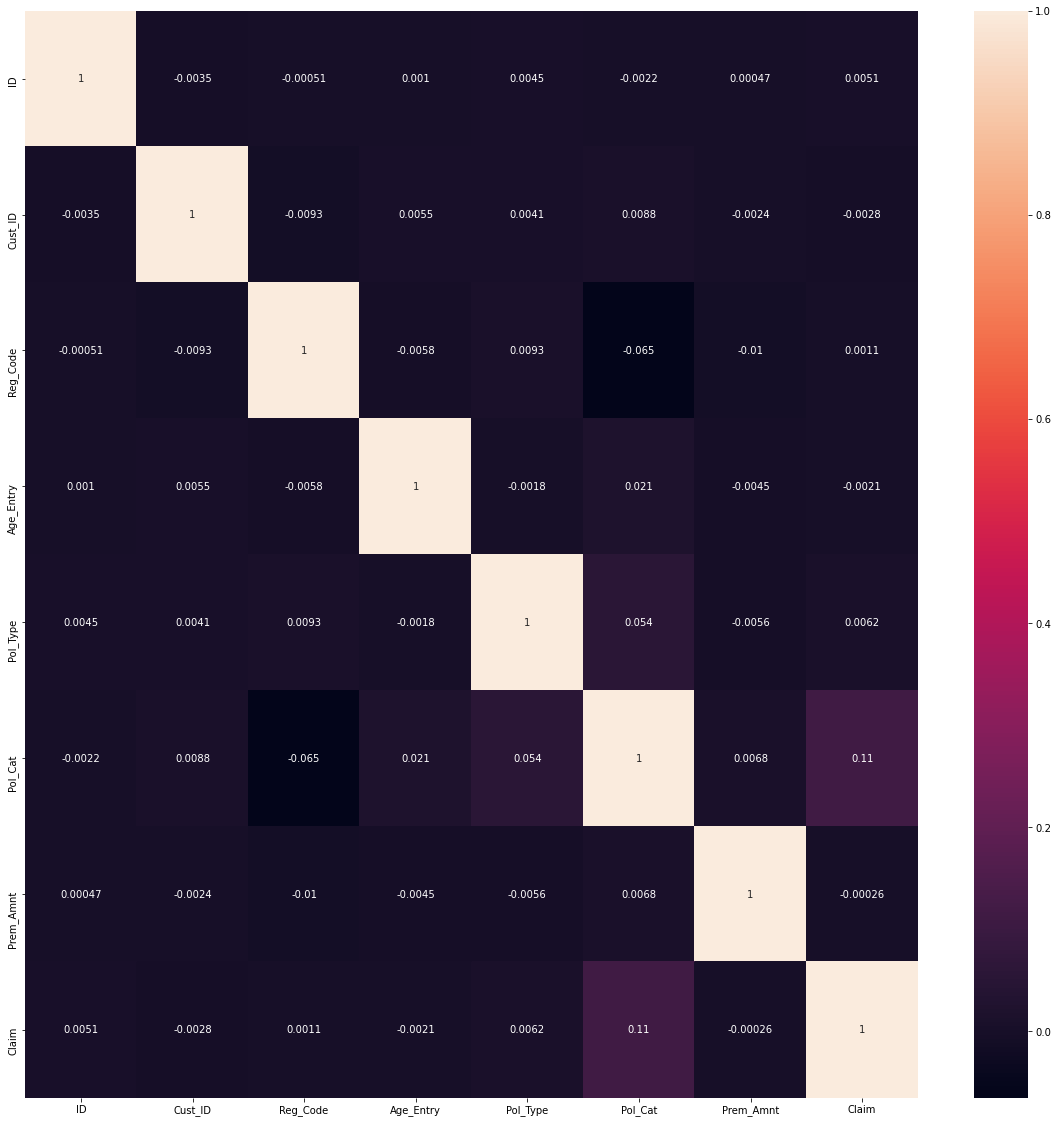

In [15]:
corrmat = df_rec.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#heatmap
g = sns.heatmap(df_rec[top_corr_features].corr(),annot=True)#,cmap="RdYlGn")

In [16]:
accom_own=pd.get_dummies(df['Accom_Own'],drop_first=True)
ins_type=pd.get_dummies(df['Ins_Type'],drop_first=True)
marital_stat=pd.get_dummies(df['Marital_Stat'],drop_first=True)
plan_code=pd.get_dummies(df['Plan_Code'],drop_first=True)
pol_dur=pd.get_dummies(df['Pol_Dur'],drop_first=True)

In [17]:
ins_type

,Joint
0,0
1,0
2,0
3,0
4,0
...,...
50877,0
50878,0
50879,1
50880,0


In [18]:
df.head()

,ID,Cust_ID,City_Code,Reg_Code,Accom_Own,Ins_Type,Age_Entry,Marital_Stat,Plan_Code,Pol_Dur,Pol_Type,Pol_Cat,Prem_Amnt,Claim
0,32003,81040.0,C3,3029,Rented,Individual,65.0,No,X1,14+,3.0,22,40171.0,1
1,32285,88349.0,C4,2583,Rented,Individual,19.0,No,X2,14+,3.0,12,13308.0,0
2,2530,80799.0,C6,4479,Rented,Individual,24.0,No,X2,14+,3.0,2,41781.0,0
3,43305,72065.0,C11,267,Owned,Individual,66.0,No,X3,14+,2.0,22,15383.0,0
4,15714,84093.0,C2,4534,Owned,Individual,52.0,No,X1,14+,3.0,3,43924.0,0


In [19]:
## Drop Categorical Features
df=df.drop(['ID','Cust_ID','Reg_Code','Accom_Own','Ins_Type','Marital_Stat','Plan_Code','Pol_Dur'],axis=1)

In [20]:
df

,City_Code,Age_Entry,Pol_Type,Pol_Cat,Prem_Amnt,Claim
0,C3,65.0,3.0,22,40171.0,1
1,C4,19.0,3.0,12,13308.0,0
2,C6,24.0,3.0,2,41781.0,0
3,C11,66.0,2.0,22,15383.0,0
4,C2,52.0,3.0,3,43924.0,0
...,...,...,...,...,...,...
50877,C1,75.0,3.0,18,22505.0,0
50878,C4,31.0,2.0,7,24212.0,0
50879,C17,55.0,3.0,21,17270.0,0
50880,C3,57.0,3.0,18,32658.0,0


In [21]:
df=pd.concat([df,accom_own,ins_type,marital_stat,plan_code,pol_dur],axis=1)

In [22]:
df

,City_Code,Age_Entry,Pol_Type,Pol_Cat,Prem_Amnt,Claim,Rented,Joint,Yes,X2,...,14+,14.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
0,C3,65.0,3.0,22,40171.0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,C4,19.0,3.0,12,13308.0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,C6,24.0,3.0,2,41781.0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,C11,66.0,2.0,22,15383.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,C2,52.0,3.0,3,43924.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,C1,75.0,3.0,18,22505.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
50878,C4,31.0,2.0,7,24212.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
50879,C17,55.0,3.0,21,17270.0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
50880,C3,57.0,3.0,18,32658.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [23]:
top10 = [x for x in df.City_Code.value_counts().sort_values(ascending=False).head(10).index]
top10

['C1', 'C2', 'C3', 'C4', 'C9', 'C6', 'C7', 'C8', 'C10', 'C5']

In [24]:
for label in top10:
    df[label] = np.where(df['City_Code']==label, 1, 0)
df[['City_Code']+top10].head(10)

,City_Code,C1,C2,C3,C4,C9,C6,C7,C8,C10,C5
0,C3,0,0,1,0,0,0,0,0,0,0
1,C4,0,0,0,1,0,0,0,0,0,0
2,C6,0,0,0,0,0,1,0,0,0,0
3,C11,0,0,0,0,0,0,0,0,0,0
4,C2,0,1,0,0,0,0,0,0,0,0
5,C7,0,0,0,0,0,0,1,0,0,0
6,C15,0,0,0,0,0,0,0,0,0,0
7,C16,0,0,0,0,0,0,0,0,0,0
8,C1,1,0,0,0,0,0,0,0,0,0
9,C3,0,0,1,0,0,0,0,0,0,0


In [25]:
def one_hot_top_x(X, variable, top_x_labels):
    for label in top_x_labels:
        df[variable+'_'+label] = np.where(df[variable]==label,1,0)
one_hot_top_x(df, 'City_Code', top10)
df= df.drop(['City_Code'], axis='columns')
df.head()

,Age_Entry,Pol_Type,Pol_Cat,Prem_Amnt,Claim,Rented,Joint,Yes,X2,X3,...,City_Code_C1,City_Code_C2,City_Code_C3,City_Code_C4,City_Code_C9,City_Code_C6,City_Code_C7,City_Code_C8,City_Code_C10,City_Code_C5
0,65.0,3.0,22,40171.0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,19.0,3.0,12,13308.0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,24.0,3.0,2,41781.0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,66.0,2.0,22,15383.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,52.0,3.0,3,43924.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [26]:
df

,Age_Entry,Pol_Type,Pol_Cat,Prem_Amnt,Claim,Rented,Joint,Yes,X2,X3,...,City_Code_C1,City_Code_C2,City_Code_C3,City_Code_C4,City_Code_C9,City_Code_C6,City_Code_C7,City_Code_C8,City_Code_C10,City_Code_C5
0,65.0,3.0,22,40171.0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,19.0,3.0,12,13308.0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,24.0,3.0,2,41781.0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,66.0,2.0,22,15383.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,52.0,3.0,3,43924.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,75.0,3.0,18,22505.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
50878,31.0,2.0,7,24212.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
50879,55.0,3.0,21,17270.0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
50880,57.0,3.0,18,32658.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### LOGISTIC REGRESSION

In [27]:
X = df.drop(['Claim'], axis='columns')
y = df['Claim']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
x = X_train #returns a numpy array
standard_scaler = StandardScaler()
x_scaled = standard_scaler.fit_transform(x)
df1 = pd.DataFrame(x_scaled)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

logr = LogisticRegression()
grid={'C':10.0 **np.arange(-2,3), 'penalty':['l1','l2']}
cv=KFold(n_splits=5, shuffle=False, random_state=None)

In [31]:
clf=GridSearchCV(logr,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [32]:
log_pred =clf.predict(X_test)
print(confusion_matrix(y_test,log_pred))
print(accuracy_score(y_test,log_pred))
print(classification_report(y_test,log_pred))

[[7789    0]
 [2385    0]]
0.7655789266758404
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      7789
           1       0.00      0.00      0.00      2385

    accuracy                           0.77     10174
   macro avg       0.38      0.50      0.43     10174
weighted avg       0.59      0.77      0.66     10174



### RANDOM FOREST

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [34]:
rfc_pred =rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print(accuracy_score(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[7440  349]
 [2201  184]]
0.7493611165716533
              precision    recall  f1-score   support

           0       0.77      0.96      0.85      7789
           1       0.35      0.08      0.13      2385

    accuracy                           0.75     10174
   macro avg       0.56      0.52      0.49     10174
weighted avg       0.67      0.75      0.68     10174



### OVERSAMPLING

In [35]:
count_class_0, count_class_1 = df.Claim.value_counts()

df_class_0 = df[df['Claim'] == 0]
df_class_1 = df[df['Claim'] == 1]

In [36]:
count_class_0, count_class_1

(38664, 12205)

In [37]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_class_1_over.shape

(38664, 50)

In [38]:
df_test_over = pd.concat([df_class_1_over, df_class_0], axis=0)

In [39]:
df_test_over.shape

(77328, 50)

In [40]:
print('Random Over Sampling:')
print(df_test_over.Claim.value_counts())

Random Over Sampling:
0    38664
1    38664
Name: Claim, dtype: int64


In [41]:
X = df_test_over.drop(['Claim'], axis='columns')
y = df_test_over['Claim']

In [42]:
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X, y, test_size=0.2, random_state=0)

### LOGISTIC REGRESSION after OVER SAMPLING

In [58]:
clf=GridSearchCV(logr,grid,cv=cv,n_jobs=-1,scoring='f1_micro')
clf.fit(X_train_o,y_train_o)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_micro')

In [59]:
log_pred =clf.predict(X_test_o)
print(confusion_matrix(y_test_o,log_pred))
print(accuracy_score(y_test_o,log_pred))
print(classification_report(y_test_o,log_pred))

[[3205 4611]
 [2472 5178]]
0.542027673606621
              precision    recall  f1-score   support

           0       0.56      0.41      0.48      7816
           1       0.53      0.68      0.59      7650

    accuracy                           0.54     15466
   macro avg       0.55      0.54      0.53     15466
weighted avg       0.55      0.54      0.53     15466



### RANDOM FOREST after OVER SAMPLING

In [45]:
rfc = RandomForestClassifier()
rfc.fit(X_train_o,y_train_o)

RandomForestClassifier()

In [46]:
rfc_pred =rfc.predict(X_test_o)
print(confusion_matrix(y_test_o,rfc_pred))
print(accuracy_score(y_test_o,rfc_pred))
print(classification_report(y_test_o,rfc_pred))

[[6764 1052]
 [ 515 7135]]
0.8986809776283461
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      7816
           1       0.87      0.93      0.90      7650

    accuracy                           0.90     15466
   macro avg       0.90      0.90      0.90     15466
weighted avg       0.90      0.90      0.90     15466



### SMOTE

In [47]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    38664
1    38664
Name: Claim, dtype: int64

In [48]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.2, random_state=0)

### LOGISTIC REGRESSION after SMOTE

In [54]:
clf=GridSearchCV(logr,grid,cv=cv,n_jobs=-1,scoring='f1_micro')
clf.fit(X_train_sm,y_train_sm)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_micro')

In [55]:
log_pred =clf.predict(X_test_sm)
print(confusion_matrix(y_test_sm,log_pred))
print(accuracy_score(y_test_sm,log_pred))
print(classification_report(y_test_sm,log_pred))

[[3205 4611]
 [2472 5178]]
0.542027673606621
              precision    recall  f1-score   support

           0       0.56      0.41      0.48      7816
           1       0.53      0.68      0.59      7650

    accuracy                           0.54     15466
   macro avg       0.55      0.54      0.53     15466
weighted avg       0.55      0.54      0.53     15466



### RANDOM FOREST after SMOTE

In [56]:
rfc = RandomForestClassifier()
rfc.fit(X_train_sm,y_train_sm)

RandomForestClassifier()

In [57]:
rfc_pred =rfc.predict(X_test_sm)
print(confusion_matrix(y_test_sm,rfc_pred))
print(accuracy_score(y_test_sm,rfc_pred))

print(classification_report(y_test_sm,rfc_pred))

[[6773 1043]
 [ 511 7139]]
0.8995215311004785
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      7816
           1       0.87      0.93      0.90      7650

    accuracy                           0.90     15466
   macro avg       0.90      0.90      0.90     15466
weighted avg       0.90      0.90      0.90     15466

